Data processing complete -- Printing Quiver Animation


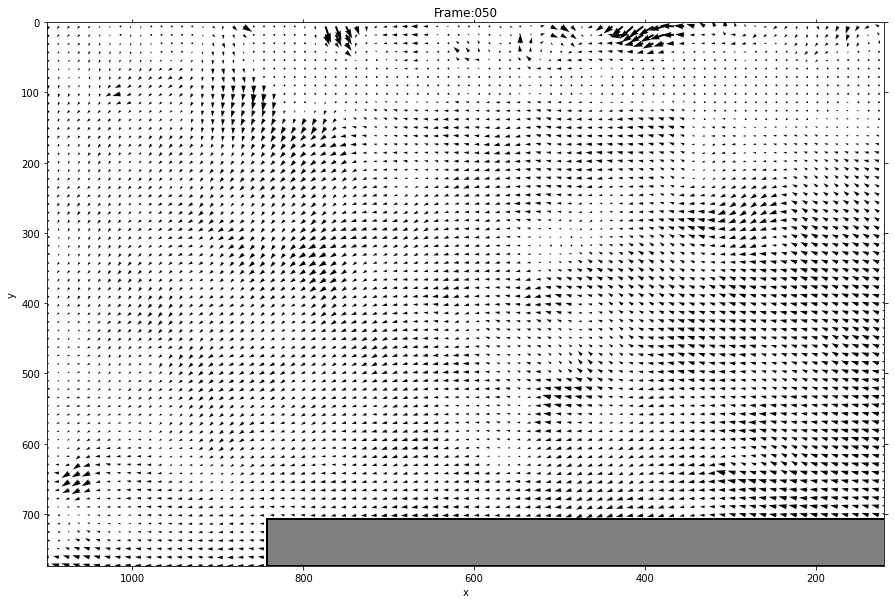

In [13]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches
import matplotlib.cm as cm
import matplotlib.colors as colors

######################################################## 

#Reading in PIV Vector Data
fileroot = '~/work/pywork/pyprojects/Filip/pivAero/V20_rear_01run/PLT_WS24/'
fileprefix = 'B00'
fileext = '.plt'

total_frames=50

# norm = Normalize()
# norm.autoscale(colors)
# # we need to normalize our colors array to match it colormap domain
# # which is [0, 1]

# colormap = cm.RdBu
    
print('Data processing complete -- Printing Quiver Animation')

######################################################## 

#Function to reset formatting after each frame
def init_func():
    
    ax1.clear()
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.invert_yaxis()
    ax1.invert_xaxis()
    ax1.add_patch(rectu_1)
    ax1.set_title("Quiver")    
    
#Function to animate plot with new after each frame
def update_plot(i):
    
    filenum = '{0:03}'.format(i+1)
    filepath = fileroot + fileprefix + filenum + fileext
    df = pd.read_csv (filepath, sep = " ") 
    shapedf= df.shape[1]

    #The textfiles are not clean and have trailing whitespaces at random files.
    #This if statement will catch the extra whitespace discrepansy in this specific data set and drop columns.
    if shapedf == 5:
        df.drop((df.columns)[[-1,-1]],axis=1,inplace=True)
    elif shapedf == 6:
        df.drop((df.columns)[[-1,-2]],axis=1,inplace=True)

    #Drop last to columns
    df.drop(index=df.index[0:106],inplace=True) #Dropping remaining data to keep reshape intervals constant

    #Append column names
    df.columns = ["x","y","u","v"]
    
    #Flip Orientation of u and v velocity vectors
#     df['u']= df['u']*-1
    df['v']= df['v']*-1
    
    #Clear Previous Quiver Object
    for obj in ax1.findobj(match = type(plt.quiver(df['x'],df['y'],df['u'],df['v']))):
        obj.remove()
        
    #Add Updated Quiver Instance
    ax1.quiver(df['x'],df['y'],df['u'],df['v'],cmap=('coolwarm'))

    ax1.set_xlim(1100,120)
    ax1.set_ylim(774,0)
#     ax1.invert_yaxis()

    title_str = "Frame:" + filenum                             
    plt.title(title_str)

########################################################     
    
#Creating Animation
#Initialise figure to prepare for animation function
fig, ((ax1)) = plt.subplots(nrows=1, ncols=1,figsize = (15,10))

rectu_1 = patches.Rectangle((6, 708), 836, 66, linewidth=2, edgecolor='black', facecolor='grey')

anim = animation.FuncAnimation(fig,update_plot,frames = total_frames, init_func = init_func)        

#Writing animation to gif file
f = r"/home/filpill/work/pywork/pyprojects/Filip/pivAero/results/piv-rear-quiver.gif" 
writergif = animation.PillowWriter(fps=12) 
anim.save(f, writer=writergif)
